<a href="https://colab.research.google.com/github/bramvandeurzen934/Group16_ECG/blob/preprocessing-en-PCA-samenvoegen/assignment_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template -- ECG data

# Introduction

The objective of this notebook is to predict if a ECG recording is normal or abnormal. The features are acquired from Fourier analysis.

This notebook covers the following components:
*   **Data description and visualization**: data exploration to get acquainted with the data structure.
*   **Preprocessing**: this section consists of scaling, outliers, etc.
*   **Feature selection and extraction**: methods to select features such as Greed feature selection and extract features such as PCA will be applied.
*   **Classifier**: the apprioriate classifier will be selected based on theoretical knowledge or experiments.
*   **Experimental and evaluation setup**: evaluation of the ECG dataset on the model.







# Data description and visualization

## Data loading

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [1]:
# Run this to use from colab environment
!git clone https://github.com/bramvandeurzen934/Group16_ECG.git

import zipfile
import os
import pandas as pd

with zipfile.ZipFile('/content/Group16_ECG/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Group16_ECG')

data = pd.read_csv('/content/Group16_ECG/ecg_data.csv', index_col=0)

Cloning into 'Group16_ECG'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 123 (delta 67), reused 12 (delta 2), pack-reused 3
Receiving objects: 100% (123/123), 69.06 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (67/67), done.


## Data description

In [ ]:
# data exploration
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


The number of samples: 827
The number of columns: 9001


In [ ]:
print('Number of unique values: \n',data.nunique().value_counts())
print('\n')
print('Number of datatypes present: \n',data.dtypes.value_counts())


Number of unique values: 
 827    6000
826    1500
824    1500
2         1
Name: count, dtype: int64


Number of datatypes present: 
 float64    9000
int64         1
Name: count, dtype: int64


There is a difference in unique numbers for different features. In the folllowing code we will look for explanations for these discongruity.

The dataset contains 9000 columns with floating variables: the outcomes of the fourrier analysis and one column with integers: the label (0 or 1). No categorical variables are present in the data.

In [ ]:
print('Number of missing values:',data.isna().sum(1).sum())

Number of missing values: 0


There are no missing values present. An assumption of the input data in our model is that missing values should be handled in a appropriate manner depending on the frequency/distribution of the missing values.

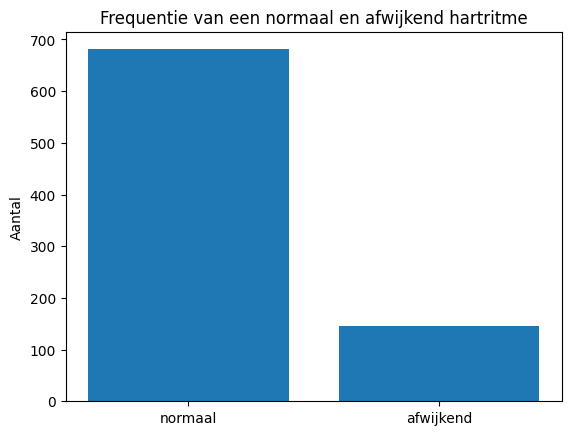

Ratio normal over abnormal ECG labels: 4.66


In [ ]:
# Verhoudingen van de groepen
import matplotlib.pyplot as plt
text = ['normaal','afwijkend']
labels = data['label']
lst_labels = list(labels)
frequentie = [lst_labels.count(0), lst_labels.count(1)]
plt.bar(text, frequentie)
plt.title('Frequentie van een normaal en afwijkend hartritme')
plt.ylabel('Aantal')
plt.show()

print(f'Ratio normal over abnormal ECG labels: {lst_labels.count(0)/lst_labels.count(1):.2f}')

The dataset is unbalanced: the number of normal ECG labels is almost 5 times larger than abnormal ECG labels.

## Data exploration (waarden gelijk aan 0 vervangen)

In [ ]:
data.loc[:,data.nunique() == 824]

,10_0,10_1,10_2,10_3,10_4,10_5,10_6,10_7,10_8,10_9,...,11_740,11_741,11_742,11_743,11_744,11_745,11_746,11_747,11_748,11_749
0,41.875218,35.634043,55.146901,78.508691,65.077005,207.545620,129.133645,41.216843,17.853091,12.161600,...,0.172247,0.078753,0.379885,0.182930,0.231552,0.222432,0.154919,0.158616,0.269249,0.112248
1,2455.348262,209.899760,73.209855,27.544186,31.050826,33.860348,45.695430,72.086416,163.059456,50.716332,...,0.930850,0.804160,0.809705,0.830032,0.774368,0.798178,0.853519,0.827946,0.859936,0.742673
2,1.075515,16.664705,21.294223,58.297014,46.693010,50.257416,43.874721,59.746670,54.488864,18.647156,...,0.032276,0.156080,0.102070,0.168276,0.120385,0.064254,0.077670,0.059857,0.098506,0.098288
3,1.038323,2.282563,23.090713,18.327925,5.515731,28.523230,227.485074,36.965269,9.597894,13.806125,...,0.104485,0.238274,0.096733,0.030739,0.170214,0.052079,0.179360,0.226222,0.092000,0.192559
4,2.652258,1.002665,7.184702,9.510938,21.350962,19.967950,5.677285,47.973415,59.175184,15.896775,...,0.078848,0.056914,0.059116,0.050098,0.152588,0.129712,0.047342,0.058446,0.141610,0.129477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,72.440238,98.826586,38.532140,69.437331,72.882899,67.224122,76.664186,40.275881,44.348151,13.289430,...,0.094904,0.024548,0.056174,0.029438,0.169014,0.111257,0.058975,0.112644,0.155580,0.061931
823,31.976060,36.614306,29.262171,27.144629,27.921450,32.460702,117.348964,211.829206,62.371423,37.218614,...,0.683881,0.808183,0.728553,0.743050,0.735316,0.724321,0.671816,0.714386,0.771741,0.757218
824,14.675614,9.904811,0.468492,17.177705,20.555421,34.692365,226.525387,76.634711,48.578796,34.150803,...,0.032643,0.103234,0.113550,0.102557,0.131152,0.057736,0.061432,0.068036,0.159615,0.077114
825,4.708455,10.636212,18.296060,22.489212,20.971064,18.732253,70.265628,69.108944,27.271947,12.750125,...,0.019307,0.150481,0.073634,0.104637,0.164451,0.055838,0.060012,0.057874,0.060548,0.116350


In [ ]:
data_zo_label = data.drop('label',axis = 1)
list_zeros = []
for column in data_zo_label.columns:
  condition = data_zo_label.loc[data[column] == 0,column]
  if not len(condition) > 0:
    list_zeros.append(column)

print(f'A total of {len(list_zeros)} contain value 0.\n')

mask_data_zero = data_zo_label == 0

dict_mask_data_zero = {'n_missing_values': mask_data_zero.sum(1)}
df_personen_zero = pd.DataFrame(dict_mask_data_zero)
df_personen_zero["labels"] = labels

personen_missing_data = df_personen_zero[df_personen_zero['n_missing_values'] > 0]
print(f'''In total, {len(personen_missing_data)} persons have missing features.
Each person is missing {personen_missing_data.iloc[0,0]} features.
{sum(personen_missing_data['labels'] == 0)} are of the class normal, whilst {sum(personen_missing_data['labels'] == 1)} are of the class abnormal''')


A total of 4500 contain value 0.

In total, 14 persons have missing features.
Each person is missing 750 features.
11 are of the class normal, whilst 3 are of the class abnormal


In [ ]:
data_zeros_replaced = replacing_zero_mean(data_zo_label)

list_zeros = []
print(len(list_zeros))
for column in data_zeros_replaced.columns:
  condition = data_zeros_replaced.loc[data_zeros_replaced[column] == 0,column]
  if len(condition) > 0:
    list_zeros.append(column)

print(f'A total of {len(list_zeros)} contain value 0.\n')

456.2600274921883
0
A total of 0 contain value 0.



As you can see above, 14 persons contain missing values. For those persons, we have decided to replace these values with the mean of this group.
This is because we do not want to loose any data. Only a small part of the total features space is missing for these samples (750 out of 9000 features).

We will replace these missing values with the average for this class, because the data is distribuited normally.

In [ ]:
# LET OP: Dit moet na de train-test-split
import numpy as np
data_zeros_replaced = data_zo_label
for column in data_zeros_replaced.columns:
  non_zero = data_zo_label.loc[data_zo_label[column] != 0,column]
  mean_non_zero = non_zero.mean()
  data_zeros_replaced.loc[data_zeros_replaced[column] == 0,column] = mean_non_zero

list_zeros = []
print(len(list_zeros))
for column in data_zeros_replaced.columns:
  condition = data_zeros_replaced.loc[data_zeros_replaced[column] == 0,column]
  if len(condition) > 0:
    list_zeros.append(column)

print(f'A total of {len(list_zeros)} contain value 0.\n')

0
A total of 0 contain value 0.



            0_0         0_1         0_2        0_3        0_4         0_5  \
0     47.685046   48.416904   37.371002  61.604757  58.732738  213.067966   
1    152.726718  297.353726  111.168880  25.419423  14.636085   24.609688   
2      1.601260    3.882169   22.978997  21.673040   8.919484   18.329286   
3      1.388947    3.052483    3.084103   4.627886  10.016196   15.020347   
4      3.625561    3.728466    6.205367  17.722897   5.699401    9.024836   
..          ...         ...         ...        ...        ...         ...   
822   14.673713   13.879148   10.000083   8.337630   3.557302    8.910661   
823    3.167367   13.771749    0.705951   0.349087   9.596407   14.721906   
824    0.439357    8.700374   20.628752  19.379063  23.176646   25.308323   
825    0.235515    4.074581    9.381945   9.621589  16.106126    8.376319   
826    0.301328    2.012000    9.122957   7.332689   7.862709   10.139178   

            0_6         0_7         0_8         0_9  ...    11_740    11_74

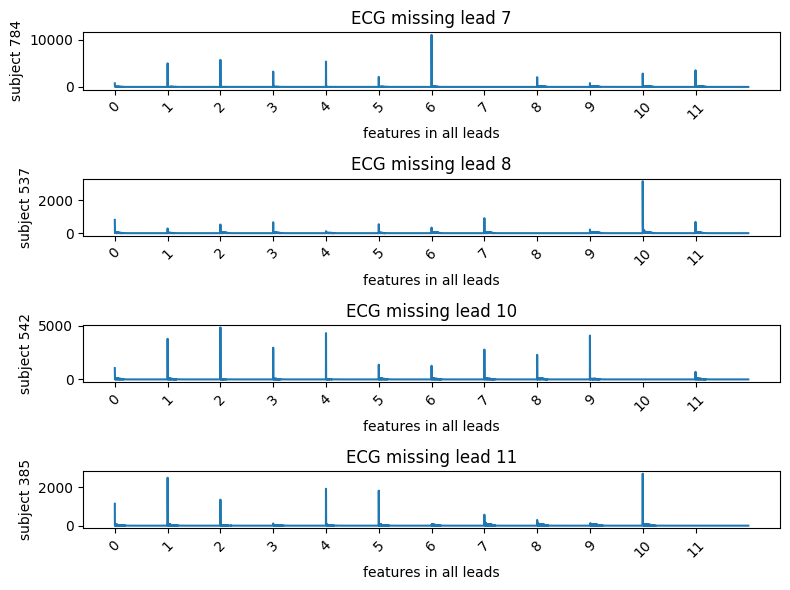

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(8, 6))

sns.lineplot(x = data.columns,y=data.iloc[784,:],ax = axes[0])
sns.lineplot(x = data.columns,y=data.iloc[537,:],ax = axes[1])
sns.lineplot(x = data.columns,y=data.iloc[542,:],ax = axes[2])
sns.lineplot(x = data.columns,y=data.iloc[385,:],ax = axes[3])


axes[0].set_xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
axes[1].set_xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
axes[2].set_xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
axes[3].set_xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)

axes[0].set(ylabel = 'subject 784',
            xlabel = 'features in all leads',
            title = 'ECG missing lead 7')
axes[1].set(ylabel = 'subject 537',
            xlabel = 'features in all leads',
            title = 'ECG missing lead 8')
axes[2].set(ylabel = 'subject 542',
            xlabel = 'features in all leads',
            title = 'ECG missing lead 10')
axes[3].set(ylabel = 'subject 385',
            xlabel = 'features in all leads',
            title = 'ECG missing lead 11')

plt.tight_layout()

plt.show()


This figure shows that for a few persons (n = 8), no recordings are available for one specific lead. This causes a lack of features for these persons.

In total there are 12 leads (0-11) and each lead has 750 features. The features in the columns are written as 0_20 with 0 the lead number and 20 the corresponding feature.



## Data visualization

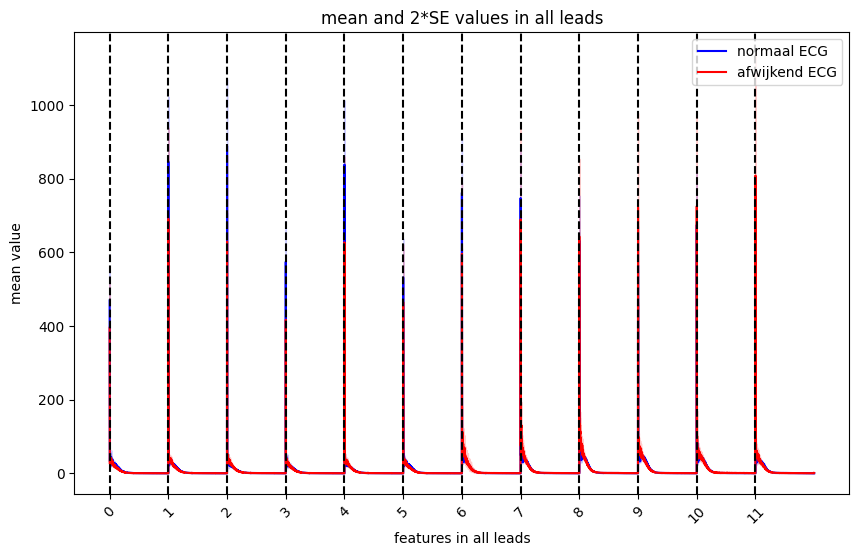

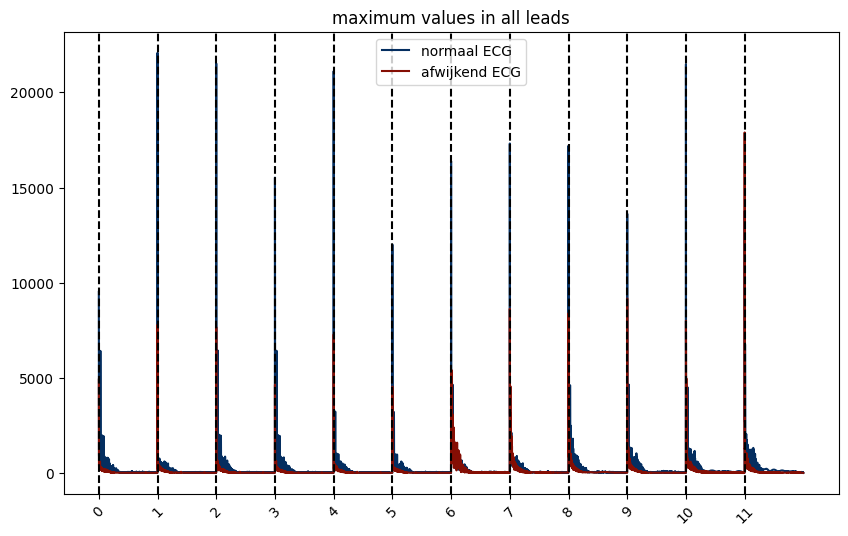

In [ ]:
data_mean_0 = data[data['label']==0].mean()
data_mean_1 = data[data['label']==1].mean()

upperbound_0 = data_mean_0 + 2 * data[data['label']==0].sem()
lowerbound_0 = data_mean_0 - 2 * data[data['label']==0].sem()

upperbound_1 = data_mean_1 + 2 * data[data['label']==1].sem()
lowerbound_1 = data_mean_1 - 2 * data[data['label']==1].sem()

data_max_0 = data[data['label'] == 0].max()
data_max_1 = data[data['label'] == 1].max()


# figure with mean values
plt.figure(figsize=[10,6])
plt.plot(data.columns,data_mean_0,color = 'b')
plt.plot(data.columns,data_mean_1,color = 'r')
plt.fill_between(data.columns,lowerbound_0,upperbound_0,alpha = 0.2, color = 'b')
plt.fill_between(data.columns,lowerbound_1,upperbound_1,alpha = 0.2, color = 'r')

for v_line in np.arange(0,9000,750):
  plt.axvline(v_line,ymin = 0,color = 'k',linestyle = '--')

plt.legend(['normaal ECG','afwijkend ECG'])
plt.xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
plt.xlabel('features in all leads')
plt.ylabel('mean value')
plt.title('mean and 2*SE values in all leads')

plt.show()

# figure with max values
plt.figure(figsize= [10,6])
plt.plot(data.columns,data_max_0,color = '#042e60')
plt.plot(data.columns,data_max_1,color = '#850e04')

for v_line in np.arange(0,9000,750):
  plt.axvline(v_line,ymin = 0,color = 'k',linestyle = '--')

plt.xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
plt.legend(['normaal ECG','afwijkend ECG'])
plt.title('maximum values in all leads')

plt.show()


Based on this figure: we decided to look deeper to the first 200 features for every lead because this area is easier to visualize. This doesn't mean that there is no useful information in the other feature but because of the scaling the feature further in the lead are smaller in the visualization.

Beside this you can see that for every lead in the beginning features reach high values. Because these values are consistently high we assume that these values aren't errors but contain usefull information. Therefore, we decided to keep the perceived outliers. These outliers go up to 1000. If values in a magnitude of millions were perceived, outliers handling would be appropriate. As no background is known about the features it is hard to estimate if outliers are errors or useful information

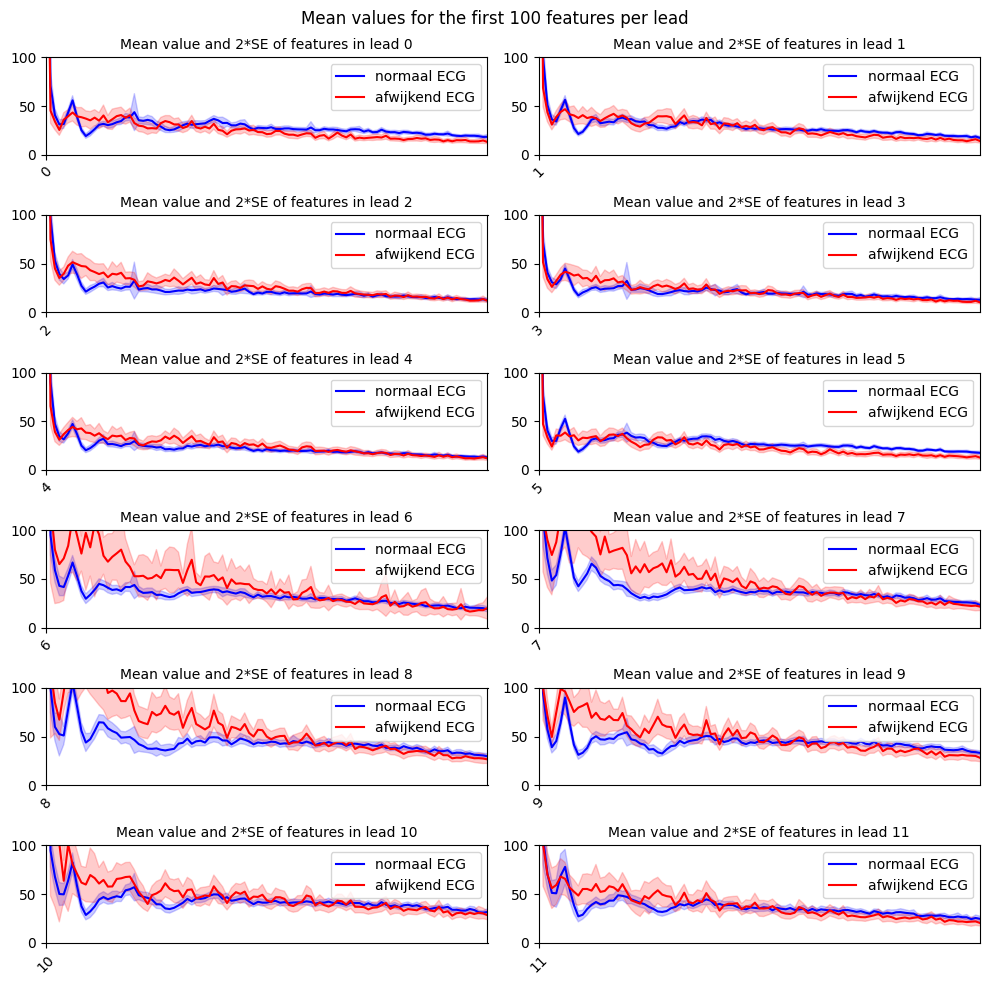

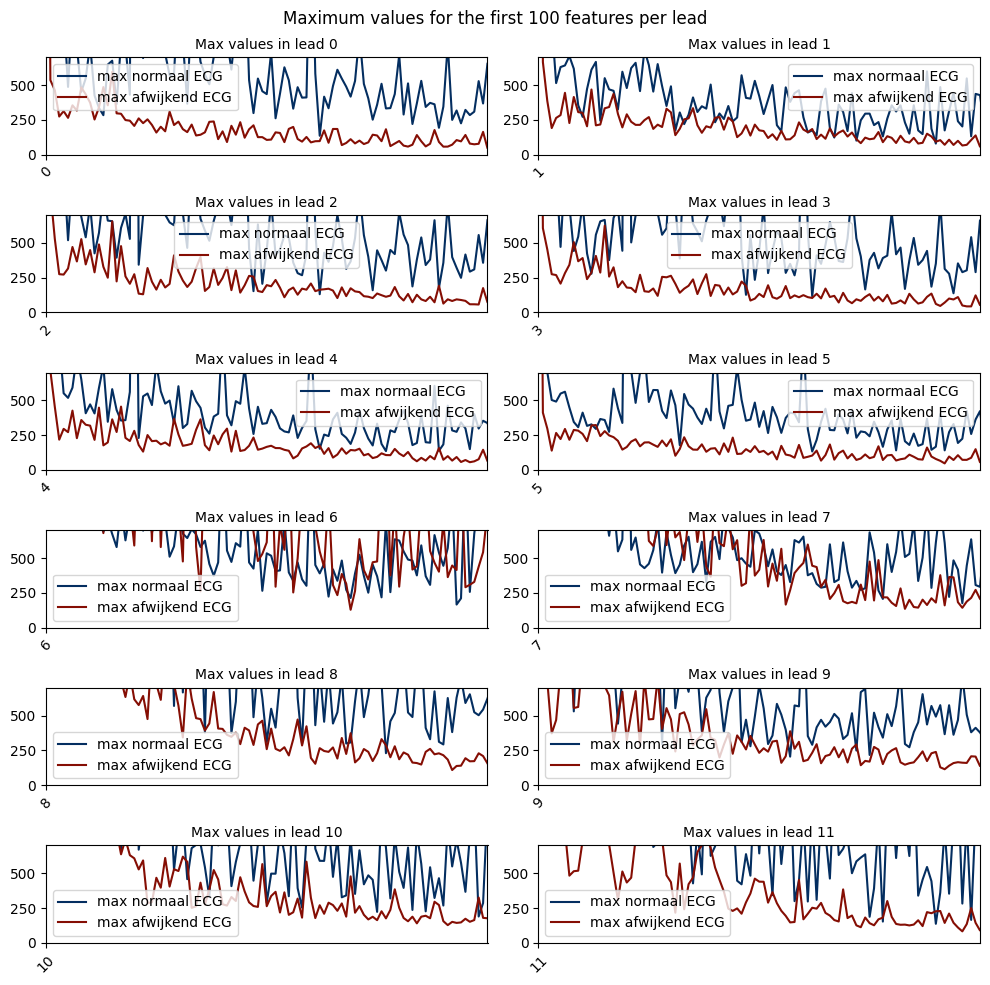

In [ ]:
# looking at the first 100 features for a better visualization

plt.figure(figsize = [10,10])

number_leads = np.arange(0,12,1)

for number_lead in number_leads:
  ax = plt.subplot(6,2,number_lead+1)
  ax.plot(data.columns,data_mean_0,color = 'b')
  ax.plot(data.columns,data_mean_1,color = 'r')
  ax.fill_between(data.columns,lowerbound_0,upperbound_0,alpha = 0.2, color = 'b')
  ax.fill_between(data.columns,lowerbound_1,upperbound_1,alpha = 0.2, color = 'r')
  ax.set_xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
  ax.set_xlim(number_lead*750,(number_lead)*750+100)
  ax.set_ylim(0,100)
  ax.set_title(f'Mean value and 2*SE of features in lead {number_lead}',fontsize = 10)
  ax.legend(['normaal ECG','afwijkend ECG'])
plt.suptitle('Mean values for the first 100 features per lead')
plt.tight_layout()
plt.show()

plt.figure(figsize = [10,10])
for number_lead in number_leads:
  ax = plt.subplot(6,2,number_lead+1)
  ax.plot(data.columns,data_max_0,color = '#042e60')
  ax.plot(data.columns,data_max_1,color = '#850e04')
  ax.set_xticks(np.arange(0,9000, 750), labels=['0', '1', '2', '3', '4', '5','6','7','8','9','10','11'],rotation = 45)
  ax.set_xlim(number_lead*750,(number_lead)*750+100)
  ax.set_ylim(0,700)
  ax.set_title(f'Max values in lead {number_lead}',fontsize = 10)
  ax.legend(['max normaal ECG','max afwijkend ECG'])
plt.suptitle('Maximum values for the first 100 features per lead')
plt.tight_layout()
plt.show()


Based on these figures we can conclude that for some patients no ECG was recorded in certain leads. Although no features are present in these leads we choose to retain these samples as information other leads may be sufficient to make a classification.

However, users of this model should identify if leads are missing in the original data. An assumption of the input data in our model is that at least 11 of the 12 leads must be present.

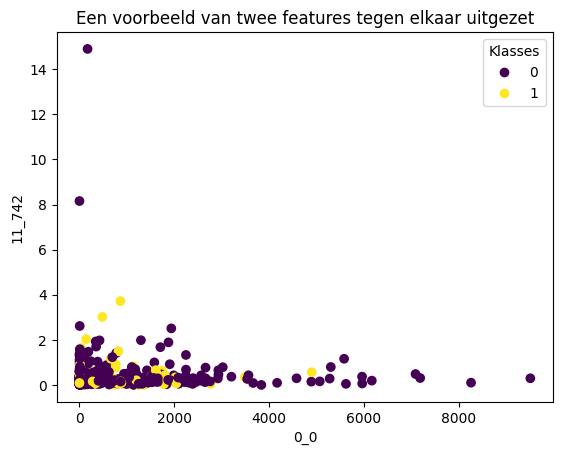

In [ ]:
# Voorbeeld van een eerste plotje
import matplotlib.pyplot as plt

feature_1 = '0_0'
feature_2 = '11_742'
scatter = plt.scatter(data[feature_1],data[feature_2], c = labels)
plt.title('Een voorbeeld van twee features tegen elkaar uitgezet')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Klasses")
plt.show()

We can make a scatter of features. We observe that values have different magnitudes. Scaling is really important to relate the features.

## Data normal distribution

In [ ]:
# Testen per feature of het normaal verdeeld is per groep
from scipy.stats import shapiro

data_gezond = data[data["label"] == 0]
data_afwijkend = data[data["label"] == 1]

data_gezond = data_gezond.drop('label',axis = 1)
data_afwijkend = data_afwijkend.drop('label',axis = 1)

niet_nrml_vd_gezond = dict()
for kolomnaam in data_gezond.columns:
  statistiek = shapiro(list(data_gezond[kolomnaam]))
  if statistiek[1] > 0.05:
    niet_nrml_vd_gezond[kolomnaam] = statistiek[1]
print(niet_nrml_vd_gezond)

niet_nrml_vd_afwijkend = dict()
for kolomnaam in data_afwijkend.columns:
  statistiek = shapiro(list(data_afwijkend[kolomnaam]))
  if statistiek[1] > 0.05:
    niet_nrml_vd_afwijkend[kolomnaam] = statistiek[1]
print(niet_nrml_vd_afwijkend)



{}
{}


conclusie: Aan de hand van een shapiro test met een p-waarde van 0.05 is gebleken dat alle features normaal verdeeld zijn.

## Visualisatie van significant meest verschillende features
Hieronder wordt een tweezijdige T-test gedaan voor de data. Er wordt gekeken of er een significant verschil is tussen de gezond of ongezond groep per feature. De meest significant verschillende features worden vervolgens gebruikt om een pairplot te maken

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
p_values = ttest_ind(a=data_gezond, b=data_afwijkend, axis = 0, equal_var=False)

dict_p_values = dict()
for kolom in data_gezond.columns:
  p_value = ttest_ind(data_gezond[kolom],data_afwijkend[kolom],equal_var=False)
  dict_p_values[kolom] = p_value[1]

dict_sorted_p_values = dict(sorted(dict_p_values.items(),key = lambda x:x[1]))
print(dict_sorted_p_values)
features_sorted = list(dict_sorted_p_values.keys())
# sort_ind = np.argsort(p_values[1])
# print(sort_ind)
# print(np.array(p_values[1]))

{'5_64': 6.22352300920535e-11, '5_81': 6.728403620970126e-11, '0_64': 1.8669030342133047e-09, '0_90': 1.9540686755693923e-09, '0_81': 2.0379036849107236e-09, '0_101': 5.375006151792281e-09, '9_9': 5.662721265565916e-09, '0_70': 6.304111445729488e-09, '5_166': 1.3749854832042605e-08, '5_156': 2.0984850102660778e-08, '5_123': 2.512071172051967e-08, '8_9': 2.7910407544108588e-08, '5_138': 5.227908290281209e-08, '5_70': 6.202075219188155e-08, '5_41': 6.346763688391622e-08, '5_90': 1.165069308968035e-07, '5_147': 1.344182583545082e-07, '5_92': 1.629267908775338e-07, '5_120': 2.646812167584494e-07, '5_73': 2.8347130195845245e-07, '0_123': 3.048464710619129e-07, '2_9': 3.0965608633527446e-07, '0_41': 4.3093908559865693e-07, '5_101': 5.224020652619585e-07, '0_92': 5.580792580979418e-07, '0_102': 6.256240478016267e-07, '5_105': 6.478881564471267e-07, '3_9': 7.137292927242835e-07, '5_72': 8.087474286271428e-07, '5_78': 9.058009543867642e-07, '1_138': 9.463575315914679e-07, '0_108': 1.05457241346

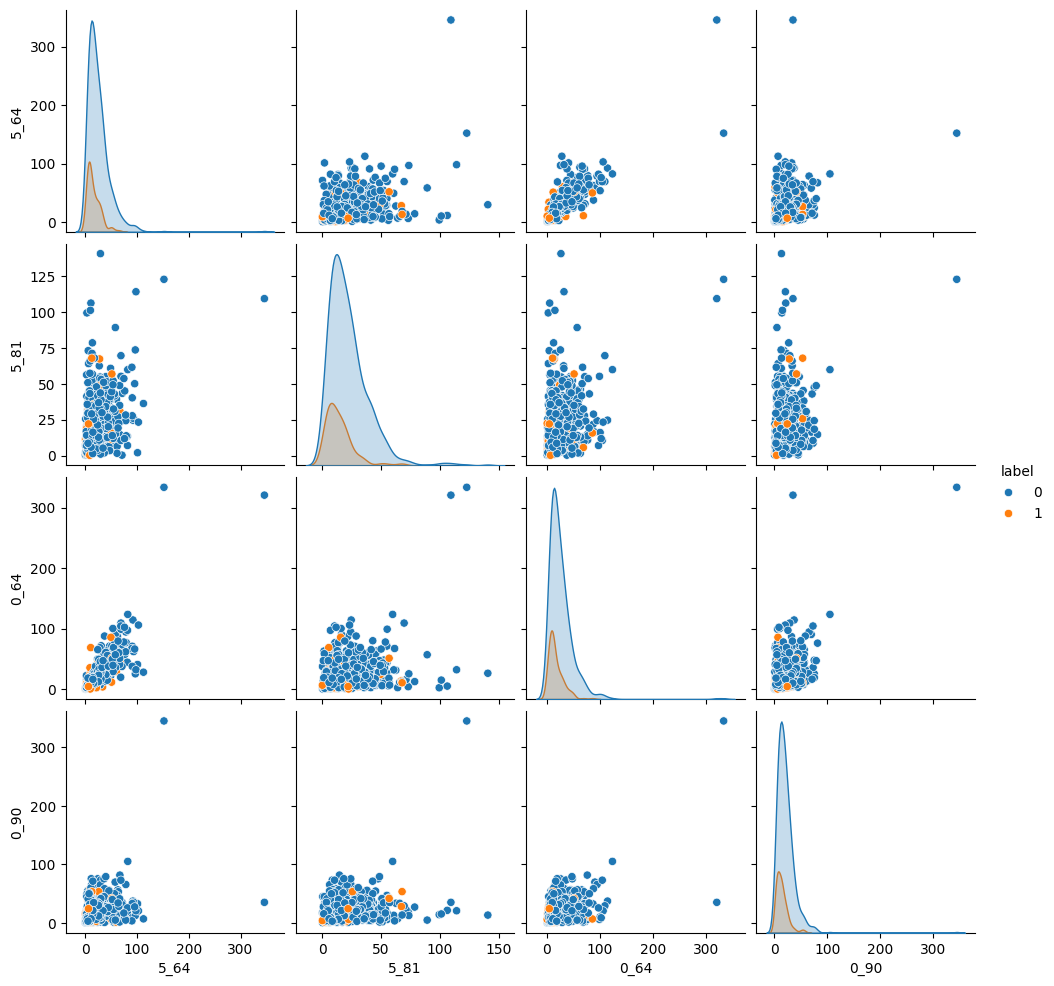

In [ ]:
import seaborn as sns
most_sign_data = data[features_sorted[:4] + ["label"]]
sns.pairplot(data = most_sign_data,hue = "label")

Conclusion: normal and abnormal ECG labels the are not linearly separable in these features. We may need to use kernels to cover the non-linear behaviour of the data.

# Preprocessing
Till now only visualizations and data exploration were performed.
No computations to the data were done, as the test data should not be spoiled.
Before preprocessing we will first split the train and testdata.
In preprocessing normalisation (scaling) and feature extraction (PCA)

## Replacing zero values with the mean
The following function replaces the zeros with the mean of this feature (without taking into account the zero)


In [ ]:
def replacing_zero_mean(data):
  """
  This function replaces the zero with the mean of the feature value.
  """
  for column in data.columns:
    non_zero = data.loc[data[column] != 0, column]
    mean_non_zero_column = non_zero.mean()
    print(mean_non_zero_column)
    data.loc[data[column] == 0,column] = mean_non_zero_column
    return data


### Correction for imbalanced classes
There are multiple options for train-test split.
 - You could use the under sampling, but you lose valuable data.
 - Another way of undersampling is with cross-validation. A downside of this method is an increased likelyhood of overfitting on the abnormal samples.
 - Another possible method is to randomly oversample the abnormal samples. However, this inreases the weight of the duplicated samples.
 - SMOTE: artificially generating new data based on the neirest neighbour of the minority class.
 - Penalizing weight correcting in the weight for the missing data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import StratifiedShuffleSplit

X = data.copy()
X = X.drop('label',axis = 1)
y = data['label']

#Performing a stratified train-test split
sss =  StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

design_index, test_index = next(sss.split(X, y))

#Selecting the training and testing samples
X_design = X.iloc[design_index]
X_test  = X.iloc[test_index]
y_design = y.iloc[design_index]
y_test  = y.iloc[test_index]


## Method 1: random oversampling
OverS = RandomOverSampler(random_state = 42)
X_over,y_over = OverS.fit_resample(X_design,y_design)

print(f"Random Oversampling: {sum(y_over == 0)} samples ar normal and {sum(y_over == 1)} are abnormal")

# ## Method 2: SMOTE
smote = SMOTE()
X_overSmote,y_overSmote = smote.fit_resample(X_design,y_design)
print(f"SMOTE: {sum(y_overSmote == 0)} samples ar normal and {sum(y_overSmote == 1)} are abnormal")

Random Oversampling: 544 samples ar normal and 544 are abnormal
SMOTE: 544 samples ar normal and 544 are abnormal


## Normalisation

In [ ]:
from sklearn import preprocessing

# standardscaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_st_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns,index = X_train.index)
X_test_st_scaled = scaler.transform(X_test)

# smin max scaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_max_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns,index = X_train.index)
X_test_max_scaled = scaler.transform(X_test)

# robust scaler
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train_rob_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns,index = X_train.index)
X_test_rob_scaled = scaler.transform(X_test)

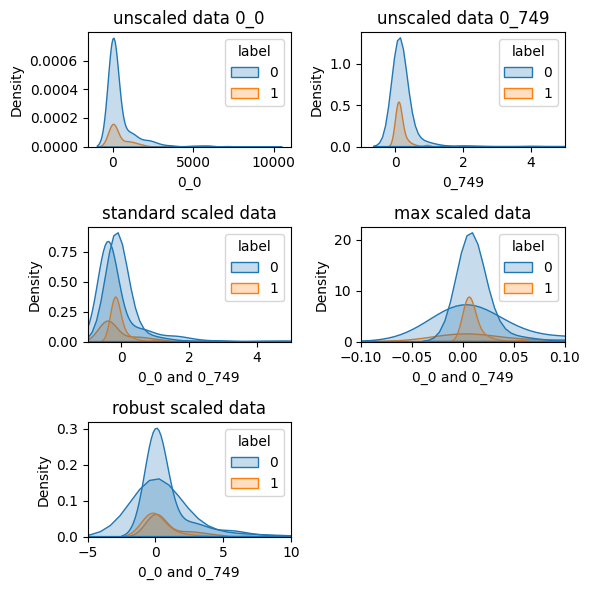

In [ ]:
# figures showing the scalers
fig, axs = plt.subplots(3,2,figsize = [6,6])

sns.kdeplot(data = X_train,x = '0_0',hue = y_train,fill = True, ax = axs[0,0])
axs[0,0].set(title = 'unscaled data 0_0')

sns.kdeplot(data = X_train,x = '0_749',hue = y_train,fill = True, ax = axs[0,1])
axs[0,1].set(title = 'unscaled data 0_749',
             xlim = [-1,5])

sns.kdeplot(data = X_train_st_scaled,x = '0_0',hue = y_train,fill = True, ax = axs[1,0])
sns.kdeplot(data = X_train_st_scaled,x = '0_749',hue = y_train,fill = True, ax = axs[1,0])
axs[1,0].set(title = 'standard scaled data',
             xlim = [-1,5],
             xlabel = '0_0 and 0_749')

sns.kdeplot(data = X_train_max_scaled,x = '0_0',hue = y_train,fill = True, ax = axs[1,1])
sns.kdeplot(data = X_train_max_scaled,x = '0_749',hue = y_train,fill = True, ax = axs[1,1])
axs[1,1].set(title = 'max scaled data',
             xlim = [-0.1,0.1],
             xlabel = '0_0 and 0_749')

sns.kdeplot(data = X_train_rob_scaled,x = '0_0',hue = y_train,fill = True, ax = axs[2,0])
sns.kdeplot(data = X_train_rob_scaled,x = '0_749',hue = y_train,fill = True, ax = axs[2,0])
axs[2,0].set(title = 'robust scaled data',
             xlim = [-5,10],
             xlabel = '0_0 and 0_749')

axs[2,1].remove()

plt.tight_layout()

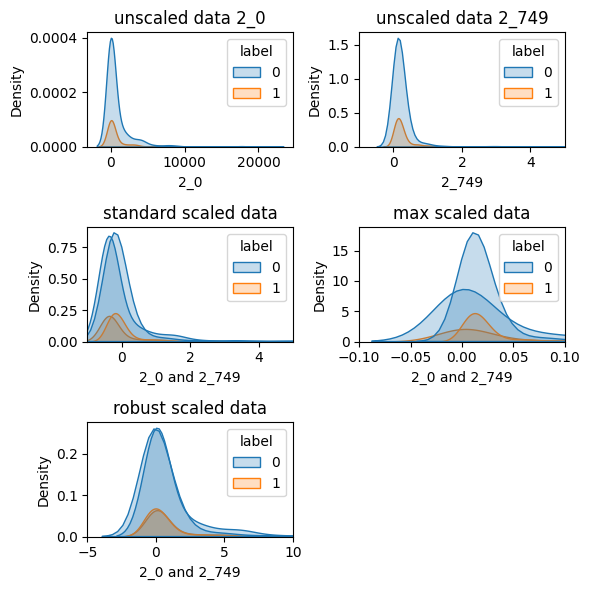

In [ ]:
# figures showing the scalers
fig, axs = plt.subplots(3,2,figsize = [6,6])

sns.kdeplot(data = X_train,x = '2_0',hue = y_train,fill = True, ax = axs[0,0])
axs[0,0].set(title = 'unscaled data 2_0')

sns.kdeplot(data = X_train,x = '2_749',hue = y_train,fill = True, ax = axs[0,1])
axs[0,1].set(title = 'unscaled data 2_749',
             xlim = [-1,5])

sns.kdeplot(data = X_train_st_scaled,x = '2_0',hue = y_train,fill = True, ax = axs[1,0])
sns.kdeplot(data = X_train_st_scaled,x = '2_749',hue = y_train,fill = True, ax = axs[1,0])
axs[1,0].set(title = 'standard scaled data',
             xlim = [-1,5],
             xlabel = '2_0 and 2_749')

sns.kdeplot(data = X_train_max_scaled,x = '2_0',hue = y_train,fill = True, ax = axs[1,1])
sns.kdeplot(data = X_train_max_scaled,x = '2_749',hue = y_train,fill = True, ax = axs[1,1])
axs[1,1].set(title = 'max scaled data',
             xlim = [-0.1,0.1],
             xlabel = '2_0 and 2_749')

sns.kdeplot(data = X_train_rob_scaled,x = '2_0',hue = y_train,fill = True, ax = axs[2,0])
sns.kdeplot(data = X_train_rob_scaled,x = '2_749',hue = y_train,fill = True, ax = axs[2,0])
axs[2,0].set(title = 'robust scaled data',
             xlim = [-5,10],
             xlabel = '2_0 and 2_749')

axs[2,1].remove()

plt.tight_layout()

Conclusions:
*   Minimum maximum scaler will not be used. When outliers are present such as in feature 0_0 we observe that distribution of feature 0_0 gets flattened. Inliers are cropped with the max scaler resulting in a deviated distribution from the original feature.
*   Robust scaler: scales the data with the IQR and median. It retains the distribution of the data especially when the distribution is not Gaussian. It is particularly useful when there is a non normal distribution.
*   Standard scaler: as there is a bit of skewness in the data of feature 0_0 we see when using the mean and standard deviation that the distribution shifts to the left. Because of outliers you can observe that the data inclines to the right (there data is not perfectly normal distributed). **When you are using standards scaled data, the mean is shifted towards the outliers and with robust scaling we don't have problems with this. **

Overall conclusions:
*   Robust scaler is preferred (other benefits: more stable and versatile)
*   Skewness is present (caused by outliers)
*   Normal distribution is perceivable (as tested by Eva before)









# Model maken
There are multiple ways to peform a train-test split. We will first try to perform a cross-validation. Based on the learning curve, we will decide whether a bootstrap is necessary (this is useful in cases with a low number of datasamples)

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
X = data.copy()
X = X.drop('label',axis = 1)
y = data['label']

#Performing a stratified train-test split
sss =  StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

train_index, test_index = next(sss.split(X, y))

#Selecting the training and testing samples
X_train = X.iloc[train_index]
X_test  = X.iloc[test_index]
y_train = y.iloc[train_index]
y_test  = y.iloc[test_index]


## Printing of the results
print(f'splitted in stratified train-test split with {len(X_train)} training samples and {len(X_train)} testing samples')
print(f'Trainset (n={len(X_train)}): {round(sum(y_train == 1)/(sum(y_train == 0)+   sum(y_train == 1)),3)*100}% of samples is abnormal')
print(f'Testset (n={len(X_test)}): {round(sum(y_test == 1)/(sum(y_test == 0)+ sum(y_test == 1)),3)*100}% of samples is abnormal')

splitted in stratified train-test split with 661 training samples and 661 testing samples
Trainset (n=661): 17.7% of samples is abnormal
Testset (n=166): 17.5% of samples is abnormal


The labels are equally divided over the design and testset

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFECV
import seaborn as sns
import matplotlib.pyplot as plt


####### PREPROCESSING #######
# 1) Replacing the zero values with their mean #
X_train.replace(0, np.nan, inplace=True)
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(X_train)
X_train_imputed = pd.DataFrame(imp_mean.transform(X_train),columns = X_train.columns,index = X_train.index)
X_test_imputed = pd.DataFrame(imp_mean.transform(X_test),columns = X_test.columns, index = X_test.index)

# 2) Normalizing the data #
# robust scaler
scaler = preprocessing.RobustScaler()
scaler.fit(X_train_imputed)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed),columns = X_train_imputed.columns,index = X_train_imputed.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed),columns = X_test_imputed.columns,index = X_test_imputed.index)

# 3) Oversampling
oversampler = SMOTE()
X_train_oversampled,y_train_oversampled = oversampler.fit_resample(X_train_scaled,y_train)


####### Feature selection #######
# 1) Feature extraction
pca = PCA(n_components=50)
pca.fit(X_train_oversampled)

X_train_pca = pca.transform(X_train_oversampled)
X_test_pca = pca.transform(X_test_scaled)

component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca,columns = component_names,index = X_train_oversampled.index)
X_test_pca = pd.DataFrame(X_test_pca,columns = component_names,index=X_test_scaled.index)

# 2) Feature selection - Lasso
lasso_model = Lasso(alpha=0.1)  # Set the regularization strength (alpha)
lasso_model.fit(X_train_pca,y_train_oversampled)
selected_features = [f'PC{i+1}' for i, coef in enumerate(lasso_model.coef_) if abs(coef) > 0.001]
X_train_lasso = X_train_pca.loc[:,selected_features]
X_test_lasso = X_test_pca.loc[:,selected_features]


# fig, axes = plt.subplots(1,2,figsize = [15,8])
# mutual_info_pca = pd.Series(mutual_info_classif(X_train_pca,y_train_oversampled),index = X_train_pca.columns).sort_values(ascending=False)
# mutual_info_lasso = pd.Series(mutual_info_classif(X_train_lasso,y_train_oversampled),index = X_train_lasso.columns).sort_values(ascending=False)
# sns.barplot(mutual_info_pca, ax = axes[0])
# axes[0].set_title(f'PCA mutual info (n_features = {mutual_info_pca.shape})')
# axes[0].set_xticklabels(mutual_info_pca.index,rotation = 90)
# sns.barplot(mutual_info_lasso,ax = axes[1])
# axes[1].set_title(f'Lasso mutual info(n_features = {mutual_info_lasso.shape[0]})')
# axes[1].set_xticklabels(mutual_info_lasso.index,rotation=90)
# plt.tight_layout()
# plt.show()

print(f'splitted in stratified train-test split with {len(X_train)} training samples and {len(X_train)} testing samples')
print(f'Trainingset (n={len(X_train)}): {round(sum(y_train == 1)/(sum(y_train == 0)+   sum(y_train == 1)),3)*100}% of samples is abnormal')
print(f'Validation set (n={len(X_test)}): {round(sum(y_test == 1)/(sum(y_test == 0)+ sum(y_test == 1)),3)*100}% of samples is abnormal')


<ipython-input-24-bf558aae9dc8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace(0, np.nan, inplace=True)


splitted in stratified train-test split with 661 training samples and 661 testing samples
Trainingset (n=661): 17.7% of samples is abnormal
Validation set (n=166): 17.5% of samples is abnormal


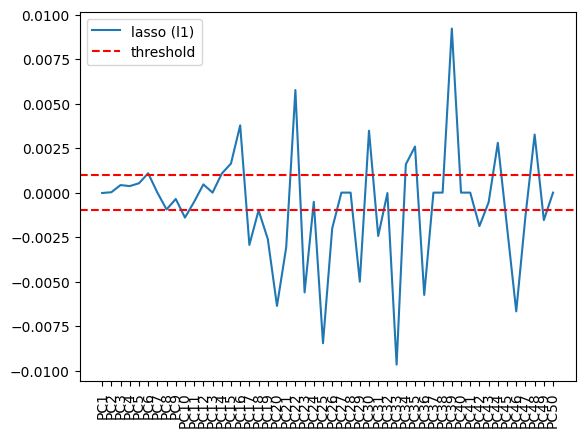

In [36]:
# Joint plot
plt.figure()
plt.plot(X_train_pca.columns,lasso_model.coef_.flatten())
plt.axhline(0.001,color ='r',linestyle = '--')
plt.axhline(-0.001,color ='r',linestyle = '--')

plt.xticks(rotation = 90)
plt.legend(['lasso (l1)','threshold'])

# Classifiers validation with GridSearchCV

In [43]:
import time
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X_train = X_train_lasso
y_train = y_train_oversampled

# Classifiers
classifiers = {
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0)}

# Grids for grid search
KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4],  # degrees for polynomial kernel
            'coef0': [0.0, 0.1, 0.5]  # homogeneity parameter
            }

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
           'max_depth': [4, 6, 8, 10, 12],
           'max features':['sqrt','log2','none'],
           'min_sample_leaf':[5, 15, 40],
           'min_samples_split': [5, 15, 30]}

# Dictionary of all grids
grid = {
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid}


i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation F1 score': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=5,scoring='f1',verbose = 3)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]= clf.best_score_

    # Save trained model
    clf_best_params[key]=clf.best_params_

    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)

    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: KNN
Training time (mins): 0.1

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model: SVC
Training time (mins): 0.11

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model: RandomForest
Training time (mins): 1.59



In [45]:
#Show results
#print("Accuracy per classifier:", valid_scores)
valid_scores

,Classifer,Validation accuracy,Training time
0,KNN,0.903368,0.10
1,SVC,0.797625,0.11
2,RandomForest,0.914592,1.59


In [46]:
# Show best parameters from grid search
print("Best parameters from grid search, for each classifier:", clf_best_params)

Best parameters from grid search, for each classifier: {'KNN': {'n_neighbors': 3, 'p': 1}, 'SVC': {'C': 1.5}, 'RandomForest': {'max_depth': 12, 'n_estimators': 300}}
